# IT Academy - Data Science with Python
## Sprint 12: Supervised Regressions
### [Github Supervised Regressions](https://github.com/jesussantana/Supervised-Regression)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Supervised-Regression.svg)](https://wakatime.com/badge/github/jesussantana/Supervised-Regression)

In [1]:
"""%pip install tabulate
%pip install scikit-optimize
%pip install fitter
%pip install missingno"""


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data treatment
# ==============================================================================
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
from datetime import datetime
from tabulate import tabulate
import missingno as msno

# # Graphics
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
from IPython.display import Image

# Preprocessing and modeling
# ==============================================================================
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats.mstats import gmean,hmean

from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFECV, SelectKBest, f_regression

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, euclidean_distances

from sklearn.inspection import permutation_importance

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

# Paralllel Processing
# ==============================================================================
import multiprocessing
from joblib import Parallel, delayed, dump, load

# Various
# ==============================================================================
import time
import random as rd
from itertools import product
from fitter import Fitter, get_common_distributions

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
from os import path
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

In [3]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

### Exercise 1: 
  - Create at least three different regression models to try to best predict DelayedFlights.csv flight delay (ArrDelay).

### Exercise 2: 
  - Compare them based on MSE and R2.

### Exercise 3: 
  - Train them using the different parameters they support

### Exercise 4: 
  - Compare your performance using the traint / test approach or using all data (internal validation)

In [4]:
df = df_raw.copy()

## Exploratory analysis

In [5]:
df.head()

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0   2211.0        2225            WN        335  N712SW              128.0   
1   1002.0        1000            WN       3231  N772SW              128.0   
2    804.0         750            WN        448  N428WN               96.0   
3   1959.0        1925            WN       3920  N464WN               90.0   
4   2121.0        2110            WN        378  N726SW              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0   
1           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0   
2            90.0     76.0      14.0       8.0    IND  BWI       515     3.0   
3            90.0     77.0      34.0      34.0    IND  BWI       515     3.0   
4           115.0     87.0      11.0      25.0    IND  JAX       688     4.0   

   TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
0      8.0          0                N         0           NaN           NaN   
1     10.0          0                N         0           NaN           NaN   
2     17.0          0                N         0           NaN           NaN   
3     10.0          0                N         0           2.0           0.0   
4     10.0          0                N         0           NaN           NaN   

   NASDelay  SecurityDelay  LateAircraftDelay  
0       NaN            NaN                NaN  
1       NaN            NaN                NaN  
2       NaN            NaN                NaN  
3       0.0            0.0               32.0  
4       NaN            NaN                NaN

In [6]:
df = df_raw.drop(labels='Unnamed: 0', axis=1)

In [7]:
df = df_raw.loc[:,["ArrDelay","ArrTime", "Distance", "TaxiIn", "TaxiOut", "DayOfWeek", "DepDelay","CarrierDelay", 'UniqueCarrier']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ArrDelay       float64
 1   ArrTime        float64
 2   Distance       int64  
 3   TaxiIn         float64
 4   TaxiOut        float64
 5   DayOfWeek      int64  
 6   DepDelay       float64
 7   CarrierDelay   float64
 8   UniqueCarrier  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 133.0+ MB


- Data sampling to reduce loading time

In [9]:
df = df.sample(frac=0.001, random_state = 6858)

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.shape

(1937, 9)

In [12]:
df.isna().sum().sort_values()

Distance           0
DayOfWeek          0
DepDelay           0
UniqueCarrier      0
TaxiOut            1
ArrDelay           6
ArrTime            6
TaxiIn             6
CarrierDelay     668
dtype: int64

## Distribution of the response variable

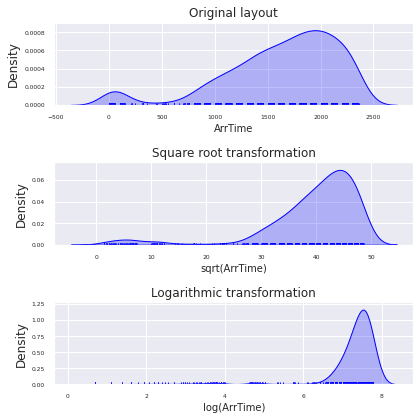

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    df.ArrTime,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrTime', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrTime),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrTime)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrTime),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrTime)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

## Identify which distribution the data best fit 

In [14]:
distributions = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

In [37]:
fitter = Fitter(df.ArrTime, distributions=distributions)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

sumsquare_error          aic           bic  kl_div
beta             0.000014  1631.204095 -36287.796917     inf
powerlaw         0.000014  1625.219274 -36250.262392     inf
logistic         0.000015  1687.053941 -36099.668529     inf
norm             0.000016  1667.226786 -36036.606048     inf
gamma            0.000016  1662.232520 -35973.267499     inf
chi2             0.000017  1665.253146 -35953.778575     inf
cauchy           0.000017  1715.340243 -35920.493406     inf
expon            0.000032  1627.457675 -34714.130214     inf
exponpow         0.000040          inf -34260.708862     NaN

## Numerical variables

In [16]:
df.select_dtypes(include=['float64', 'int']).describe()

ArrDelay      ArrTime     Distance       TaxiIn      TaxiOut  \
count  1931.000000  1931.000000  1937.000000  1931.000000  1936.000000   
mean     42.473848  1619.844640   749.701600     6.686173    18.018595   
std      56.640112   549.546968   569.053389     4.469692    13.465994   
min     -25.000000     2.000000    45.000000     1.000000     1.000000   
25%       9.000000  1334.000000   334.000000     4.000000    10.000000   
50%      24.000000  1730.000000   594.000000     6.000000    14.000000   
75%      55.000000  2029.500000   984.000000     8.000000    21.000000   
max     569.000000  2359.000000  3329.000000    44.000000   137.000000   

         DayOfWeek     DepDelay  CarrierDelay  
count  1937.000000  1937.000000   1269.000000  
mean      3.979350    43.697470     18.381403  
std       1.954701    53.677347     42.626851  
min       1.000000     6.000000      0.000000  
25%       2.000000    12.000000      0.000000  
50%       4.000000    24.000000      1.000000  
75%       5.000000    53.000000     19.000000  
max       7.000000   571.000000    569.000000

Text(0.5, 0.98, 'Distribution Numerical Variable')

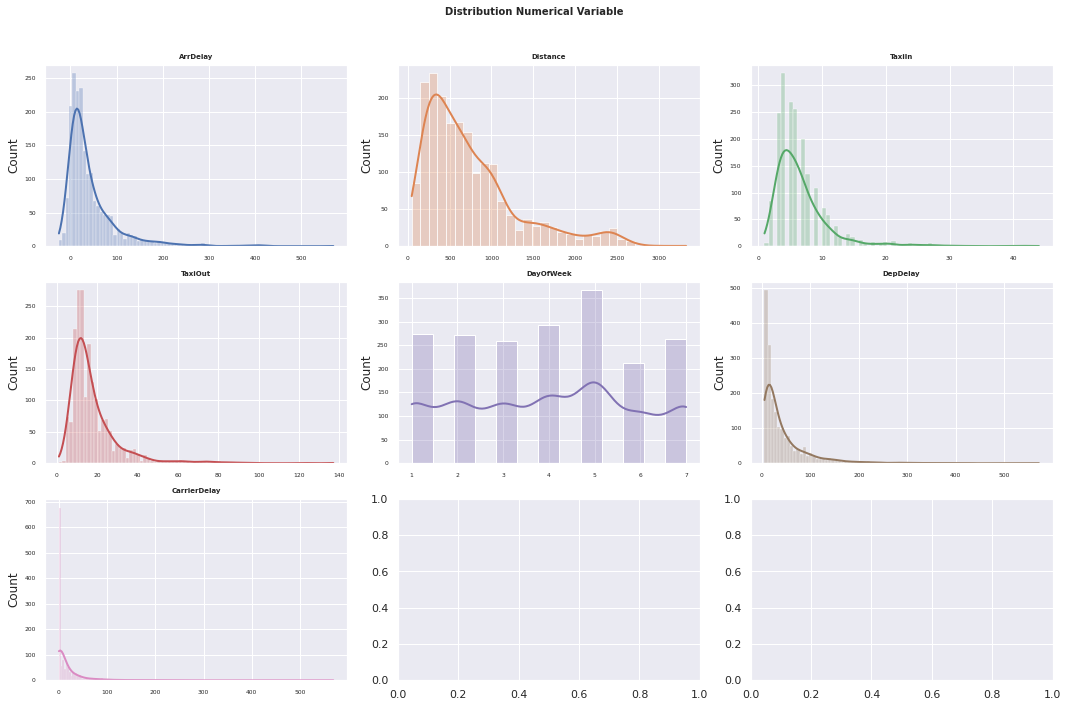

In [17]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrTime')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 10, fontweight = "bold")

Text(0.5, 0.98, 'Correlación con ArrTime')

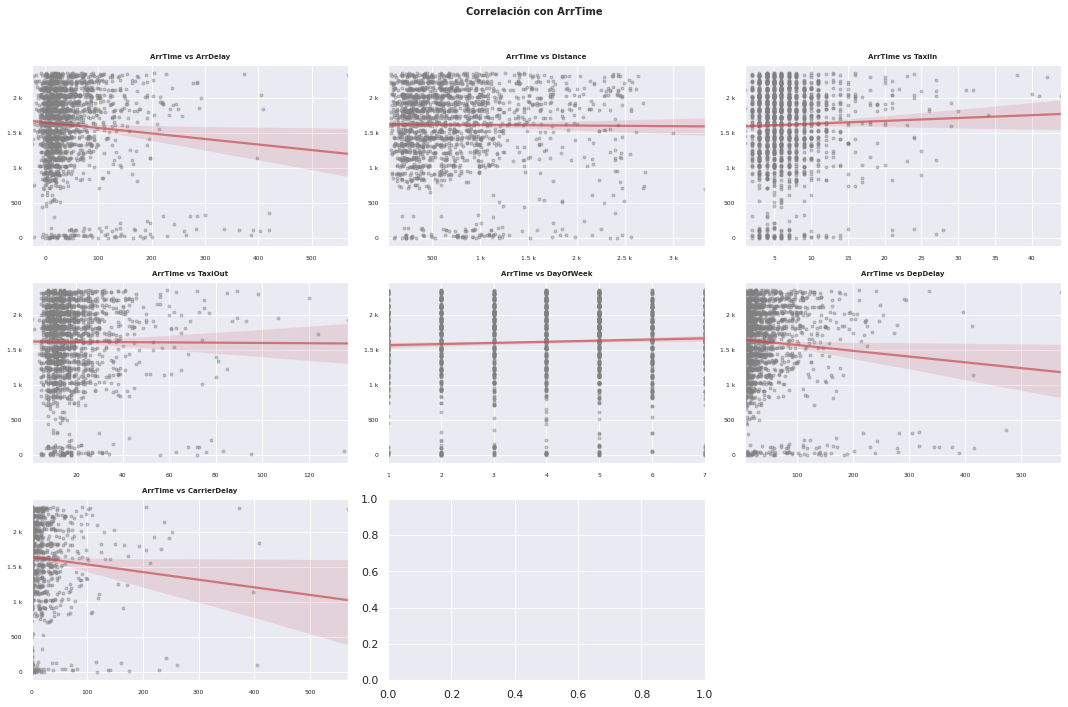

In [18]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrTime')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrTime'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrTime vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con ArrTime', fontsize = 10, fontweight = "bold")

## Numerical variables correlation

In [19]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

variable_1    variable_2         r     abs_r
48      DepDelay      ArrDelay  0.959996  0.959996
6       ArrDelay      DepDelay  0.959996  0.959996
62  CarrierDelay      DepDelay  0.481901  0.481901
55      DepDelay  CarrierDelay  0.481901  0.481901
7       ArrDelay  CarrierDelay  0.451189  0.451189
56  CarrierDelay      ArrDelay  0.451189  0.451189
32       TaxiOut      ArrDelay  0.240119  0.240119
4       ArrDelay       TaxiOut  0.240119  0.240119
3       ArrDelay        TaxiIn  0.130539  0.130539
24        TaxiIn      ArrDelay  0.130539  0.130539

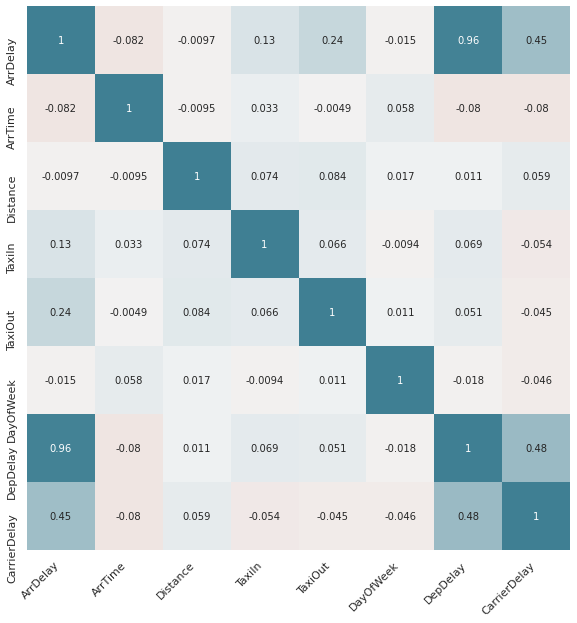

In [20]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 11)

## Qualitative variables

In [21]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

UniqueCarrier
count           1937
unique            20
top               WN
freq             388

Text(0.5, 0.98, 'Qualitative variable distribution')

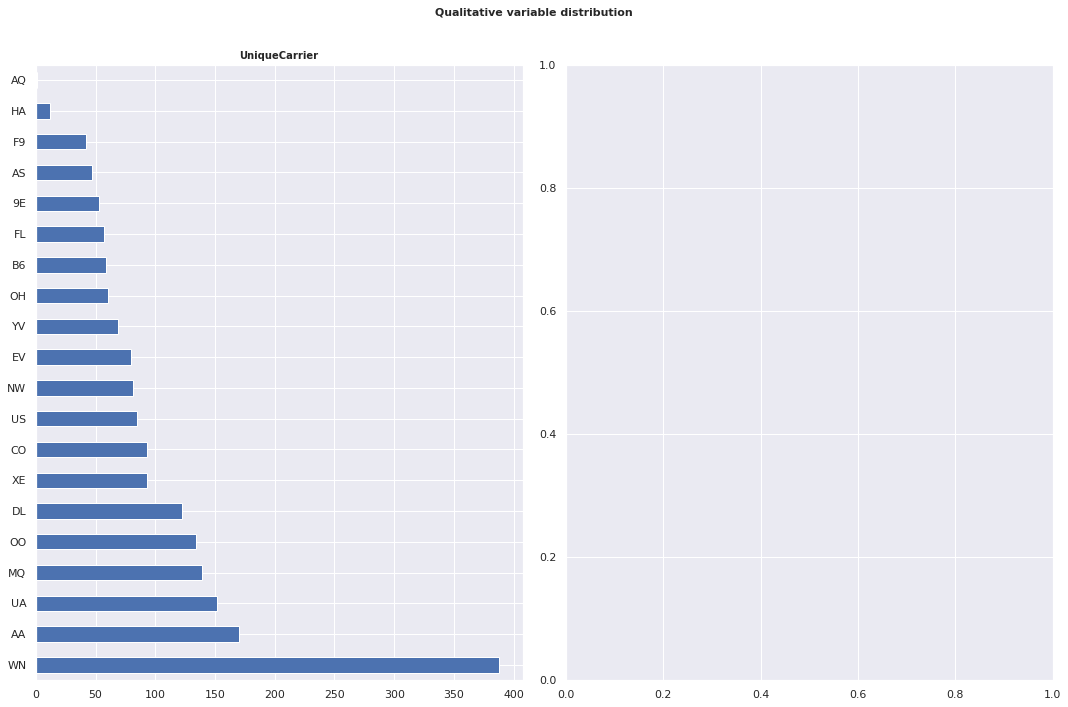

In [22]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 11, fontweight = "bold")

Text(0.5, 0.98, 'ArrTime distribution by group')

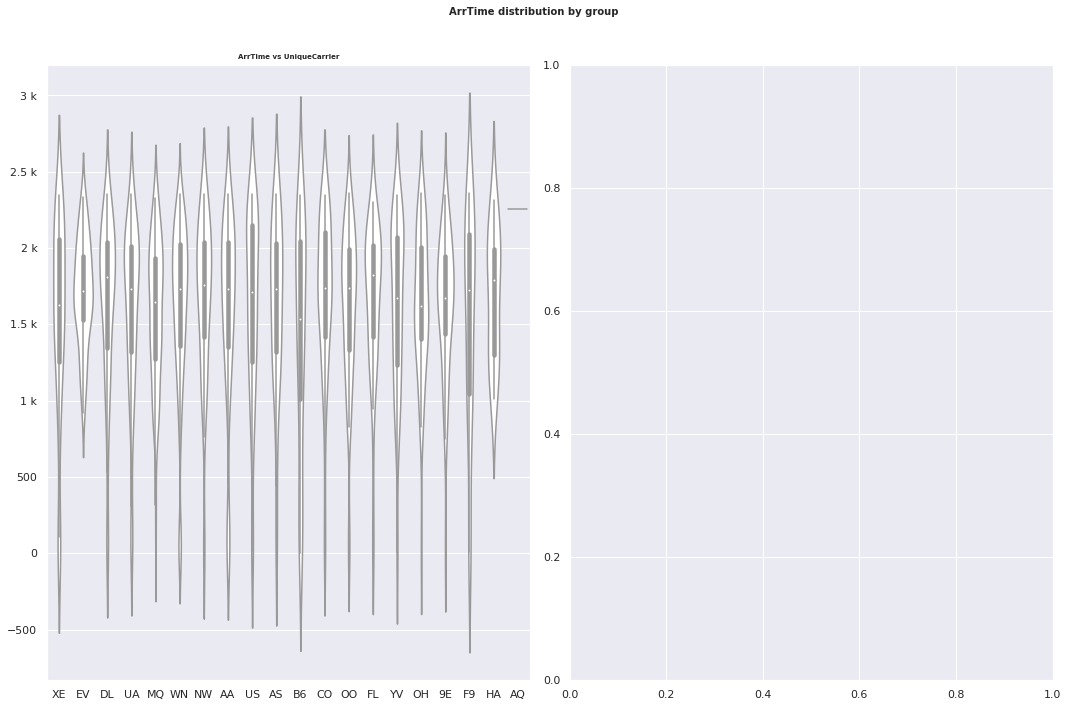

In [23]:
# Graph relationship between the price and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ArrTime',
        data  = df,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"ArrTime vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrTime distribution by group', fontsize = 10, fontweight = "bold")

## Create Categorical Dummies

In [24]:
import categorical 

df = categorical.transform(df, "UniqueCarrier")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ArrDelay          1931 non-null   float64
 1   ArrTime           1931 non-null   float64
 2   Distance          1937 non-null   int64  
 3   TaxiIn            1931 non-null   float64
 4   TaxiOut           1936 non-null   float64
 5   DayOfWeek         1937 non-null   int64  
 6   DepDelay          1937 non-null   float64
 7   CarrierDelay      1269 non-null   float64
 8   UniqueCarrier_9E  1937 non-null   uint8  
 9   UniqueCarrier_AA  1937 non-null   uint8  
 10  UniqueCarrier_AQ  1937 non-null   uint8  
 11  UniqueCarrier_AS  1937 non-null   uint8  
 12  UniqueCarrier_B6  1937 non-null   uint8  
 13  UniqueCarrier_CO  1937 non-null   uint8  
 14  UniqueCarrier_DL  1937 non-null   uint8  
 15  UniqueCarrier_EV  1937 non-null   uint8  
 16  UniqueCarrier_F9  1937 non-null   ui

## Imputation of missing values

In [26]:
df.isnull().sum().sum()

687

In [27]:
import missing

In [28]:
df[:] = missing.transform(df[:])

In [29]:
df.isnull().sum().sum()

0

## Divide the data set into training set and test set

In [30]:
# Matrix
X = df.drop('ArrTime', axis = 'columns')
# Vector
y = df['ArrTime']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6858)

In [32]:
print(">>>Train partition")
print("-----------------------")
print(y_train.describe())

>>>Train partition
-----------------------
count    1549.000000
mean     1617.756015
std       554.946958
min         2.000000
25%      1333.000000
50%      1730.000000
75%      2032.000000
max      2359.000000
Name: ArrTime, dtype: float64


In [33]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count     388.000000
mean     1628.182990
std       523.598935
min         2.000000
25%      1348.750000
50%      1719.500000
75%      2025.250000
max      2354.000000
Name: ArrTime, dtype: float64


## Create a Model

- Linear regressions Internal, External

In [34]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Intern
regr_INT = linear_model.LinearRegression()
regr_INT.fit(X,y)
pred_INT = regr_INT.predict(X)
print("R2 Intern: %.4f" % r2_score(y, pred_INT))
print("MSE: %.4f" % mean_squared_error(y, pred_INT))

# Extern
regr_EXT = linear_model.LinearRegression()
regr_EXT.fit(X_train,y_train)
pred_EXT = regr_EXT.predict(X_test)
print("\nR2 Extern: %.4f" %  r2_score(y_test, pred_EXT))
print("MSE Extern: %.4f" %  mean_squared_error(y_test, pred_EXT))

R2 Intern: 0.0207
MSE: 294673.2526

R2 Extern: -0.0054
MSE Extern: 274929.0742


- View training results

In [35]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regr_EXT.predict(X_train), color = "blue")
plt.title("Departure Delay vs Arrived Delay (Trainning Set)")
plt.xlabel("Departure Delay")
plt.ylabel("Arrived Delay")
plt.show()

ValueError: x and y must be the same size

## Multiple Linear Regression

In [38]:
# Matrix
X = df.iloc[:, :-1].values
# Vector
y = df.iloc[:, 0].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6858)

In [40]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regression.predict(X_test)

- Build the optimal RLM model

In [42]:
import statsmodels.api as sm

In [43]:
X_opt = X[:, [1, 2, 3, 4, 5, 6]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2, 3, 4]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2, 3]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.309
Model:                            OLS   Adj. R-squared (uncentered):              0.308
Method:                 Least Squares   F-statistic:                              432.6
Date:                Sun, 23 May 2021   Prob (F-statistic):                   5.14e-156
Time:                        12:46:57   Log-Likelihood:                         -10640.
No. Observations:                1937   AIC:                                  2.128e+04
Df Residuals:                    1935   BIC:                                  2.129e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0183      0.001     15.383      0.000       0.016       0.021
x2             0.0106      0.002      4.928      0.000       0.006       0.015
==============================================================================
Omnibus:                     1258.632   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15981.638
Skew:                           2.919   Prob(JB):                         0.00
Kurtosis:                      15.804   Cond. No.                         3.29
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Build the optimal RLM model using Automatic Backward Elimination

In [44]:
def backwardElimination(x, sl):    
    numVars = len(x[0])    
    for i in range(0, numVars):        
        regressor_OLS = sm.OLS(y, x.tolist()).fit()        
        maxVar = max(regressor_OLS.pvalues).astype(float)        
        if maxVar > sl:            
            for j in range(0, numVars - i):                
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):                    
                    x = np.delete(x, j, 1)    
        
    return x, regressor_OLS.summary()
 
SL = 0.05
X_opt = X[:, [1, 2, 3, 4, 5, 6]]
X_Modeled, summary = backwardElimination(X_opt, SL)

In [45]:
X_Modeled

array([[1.417e+03, 3.700e+02, 6.000e+00, 1.300e+01, 2.000e+00, 9.200e+01],
       [1.932e+03, 3.170e+02, 1.200e+01, 1.700e+01, 4.000e+00, 8.000e+00],
       [1.031e+03, 2.105e+03, 8.000e+00, 1.800e+01, 1.000e+00, 1.300e+01],
       ...,
       [1.934e+03, 2.480e+02, 4.000e+00, 1.400e+01, 5.000e+00, 9.000e+00],
       [1.817e+03, 2.560e+02, 6.000e+00, 6.000e+00, 3.000e+00, 9.000e+01],
       [1.130e+03, 1.900e+02, 3.000e+00, 2.200e+01, 6.000e+00, 5.300e+01]])

In [46]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              9492.
Date:                Sun, 23 May 2021   Prob (F-statistic):                        0.00
Time:                        12:46:57   Log-Likelihood:                         -7687.7
No. Observations:                1937   AIC:                                  1.539e+04
Df Residuals:                    1931   BIC:                                  1.542e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0053      0.000    -13.183      0.000      -0.006      -0.004
x2            -0.0056      0.000    -11.334      0.000      -0.007      -0.005
x3             0.4871      0.063      7.697      0.000       0.363       0.611
x4             0.7354      0.021     34.892      0.000       0.694       0.777
x5            -0.7779      0.135     -5.762      0.000      -1.043      -0.513
x6             0.9768      0.005    182.798      0.000       0.966       0.987
==============================================================================
Omnibus:                     1367.873   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143250.957
Skew:                          -2.497   Prob(JB):                         0.00
Kurtosis:                      44.833   Cond. No.                         868.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## KFold

In [47]:
df = df.sample(frac=1).head(5000)

df = df.reset_index() # Importante resetear index al hacer seleccion aleatoria

X = df[["ArrTime", "Distance", "DepDelay"]]
y = df["ArrDelay"]

In [48]:
# Replicar el proceso anterior multiples veces 
from sklearn.model_selection import KFold 

kf = KFold(n_splits= 10, shuffle = True)  # particiones / mezcla de datos

kf.get_n_splits(X) # particiones concretas

10

In [49]:
# ajustar un modelo regresion lineal
#regr = linear_model.LinearRegression()
regr_INT = linear_model.LinearRegression()
regr_EXT = linear_model.LinearRegression()
resultados_Interno = []
resultados_Externo = []

for train_index, test_index in kf.split(X):  # indices
    X_train, X_test = X.loc[train_index,], X.loc[test_index] # objetos validacion externa
    y_train, y_test = y[train_index], y[test_index]
    """regr.fit(X_train, y_train)  #ajustar el modelo
    predicciones = regr.predict(X_test)  # prediciones test
    print("R2: %.4f" %  r2_score(y_test, predicciones))  # evaluar con test
    print("MSE: %.4f" %  mean_squared_error(y_test, predicciones))"""

    # Extern

    regr_EXT.fit(X_train,y_train)
    pred_EXT = regr_EXT.predict(X_test)
    print("\nR2 Extern: %.4f" %  r2_score(y_test, pred_EXT))
    print("MSE Extern: %.4f" %  mean_squared_error(y_test, pred_EXT))

    resultados_Externo.append(r2_score(y_test, pred_EXT))


"""for train_index, test_index in kf.split(X):  # indices
    X_train, X_test = X.loc[train_index,], X.loc[test_index] # objetos validacion externa
    y_train, y_test = y[train_index], y[test_index]"""

   



print("\nR2 medio: %.4f"% np.mean(resultados_Externo))

    # Intern

regr_INT.fit(X,y)
pred_INT = regr_INT.predict(X)
print("\nR2 Intern: %.4f" % r2_score(y, pred_INT))
print("MSE: %.4f" % mean_squared_error(y, pred_INT))

"""resultados_Interno.append(r2_score(y_test, pred_INT)) 

print("R2 medio: %.4f"% np.mean(resultados_Interno))"""


R2 Extern: 0.9154
MSE Extern: 176.3794

R2 Extern: 0.8917
MSE Extern: 427.0090

R2 Extern: 0.8753
MSE Extern: 263.8836

R2 Extern: 0.9359
MSE Extern: 168.5552

R2 Extern: 0.8780
MSE Extern: 332.9293

R2 Extern: 0.9631
MSE Extern: 182.9868

R2 Extern: 0.8575
MSE Extern: 533.6365

R2 Extern: 0.9001
MSE Extern: 289.4041

R2 Extern: 0.9173
MSE Extern: 244.1849

R2 Extern: 0.9440
MSE Extern: 212.0312

R2 medio: 0.9078

R2 Intern: 0.9122
MSE: 280.7985


'resultados_Interno.append(r2_score(y_test, pred_INT)) \n\nprint("R2 medio: %.4f"% np.mean(resultados_Interno))'

In [50]:
# como de dependiente es la evaluacion del modelo en relacion del conjunto train,test utilizado

## Polynomial Regression

In [51]:
df.head()

index  ArrDelay  ArrTime  Distance  TaxiIn  TaxiOut  DayOfWeek  DepDelay  \
0   657983      18.0   1412.0     508.0    14.0     11.0        7.0       8.0   
1    69272      20.0   1235.0    1249.0     7.0     25.0        5.0      14.0   
2  1778628     190.0   2327.0     772.0     6.0     35.0        1.0     175.0   
3  1936521      13.0    902.0     356.0     4.0     24.0        5.0      14.0   
4    44775      12.0    740.0     441.0     5.0      6.0        1.0      20.0   

   CarrierDelay  UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AQ  \
0      3.000000               0.0               0.0               0.0   
1     14.000000               0.0               0.0               0.0   
2      0.000000               0.0               0.0               0.0   
3     18.381403               0.0               0.0               0.0   
4     18.381403               0.0               0.0               0.0   

   UniqueCarrier_AS  UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               1.0   
4               0.0               0.0               0.0               0.0   

   UniqueCarrier_EV  UniqueCarrier_F9  UniqueCarrier_FL  UniqueCarrier_HA  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   UniqueCarrier_MQ  UniqueCarrier_NW  UniqueCarrier_OH  UniqueCarrier_OO  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   UniqueCarrier_UA  UniqueCarrier_US  UniqueCarrier_WN  UniqueCarrier_XE  \
0               0.0               0.0               0.0               0.0   
1               1.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               1.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   UniqueCarrier_YV  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               1.0

In [52]:
df_sample = df.sample(n=25, random_state=1)

In [53]:
# Matrix
X = df_sample.iloc[:, 7:8].values

# Vector
y = df_sample.iloc[:, 0:1].values


In [54]:
X.shape
y.shape

(25, 1)

- Fit Polynomial regression with the dataset

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualization of the results of the Polynomial Model vs Linear Regression

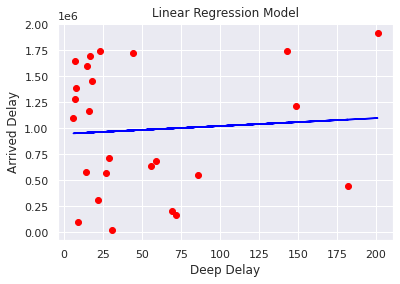

In [57]:
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Linear Regression Model")
plt.xlabel("Deep Delay")
plt.ylabel("Arrived Delay")
plt.show()

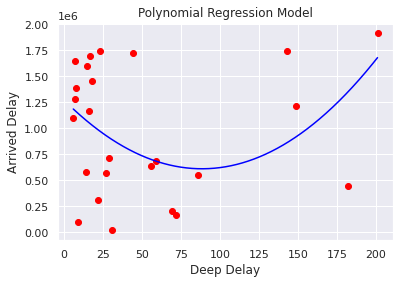

In [58]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color = "red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = "blue")
plt.title("Polynomial Regression Model")
plt.xlabel("Deep Delay")
plt.ylabel("Arrived Delay")
plt.show()